In [2]:
# Project 2: Credit Clustering
# Manuel Duran
# DSC 680

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
import os
import plotly.io as pio
pio.renderers.default='notebook'

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [5]:
import category_encoders as ce
plt.style.use('seaborn-colorblind')
%matplotlib inline

**EDA**

In [62]:
df = pd.read_csv('german_credit_data.csv', index_col = 'Unnamed: 0')

In [65]:
dfeda = pd.read_csv("german_credit_data.csv")

In [66]:
dfeda.drop("Unnamed: 0", inplace=True, axis=1)
dfeda.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [67]:
job_dictionary = {0:"unskilled and non-resident", 1:"unskilled and resident", 2:"skilled", 3:"higly skilled"}
dfeda = dfeda.replace({"Job":job_dictionary})
dfeda.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


In [7]:
# Review the dataset variables
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [8]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [10]:
df.describe(include=['object'])

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [11]:
numeric = ['Age', 'Job', 'Credit amount', 'Duration']
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [12]:
def check_missing(data, output_path=None):
    
    result = pd.concat([data.isnull().sum(), data.isnull().mean()], axis=1)
    result = result.rename(index=str, columns={0: 'total missing', 1: 'proportion'})
    if output_path:
        result.to_csv(f'{output_path}missing.csv')
        print(output_path, 'missing.csv')
    return result

In [13]:
check_missing(data=df)

,total missing,proportion
Age,0,0.000
Sex,0,0.000
Job,0,0.000
Housing,0,0.000
Saving accounts,183,0.183
Checking account,394,0.394
Credit amount,0,0.000
Duration,0,0.000
Purpose,0,0.000


In [14]:
df= df.fillna('unknown')

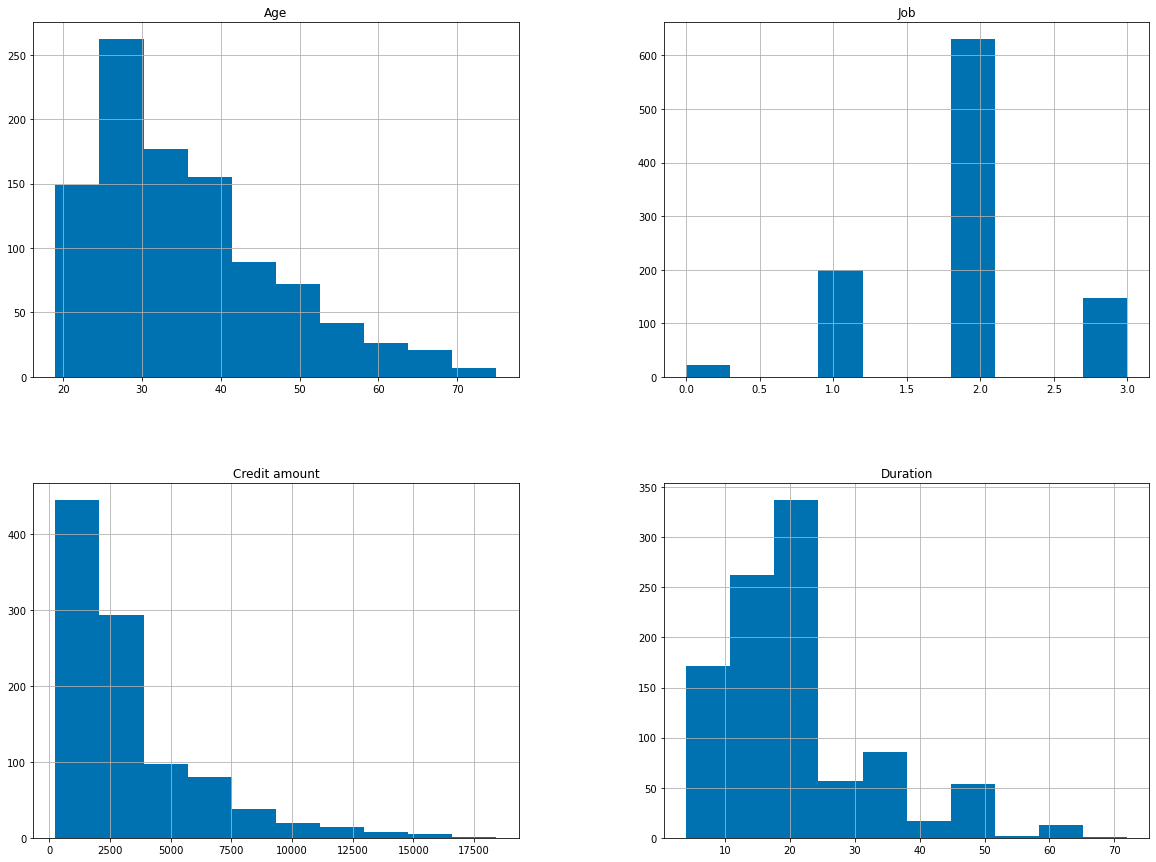

In [15]:
df.hist(figsize = (20,15));

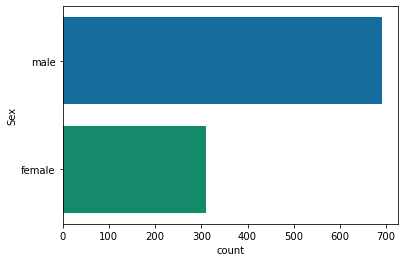

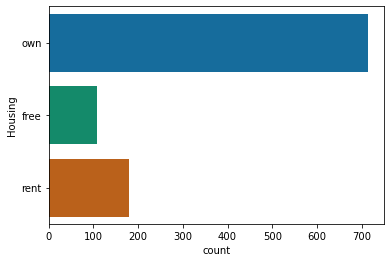

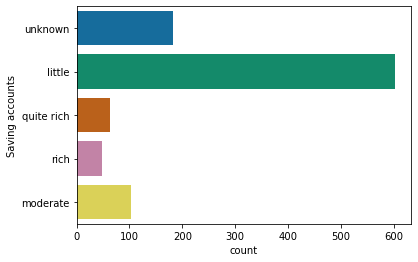

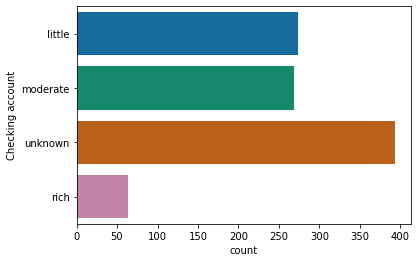

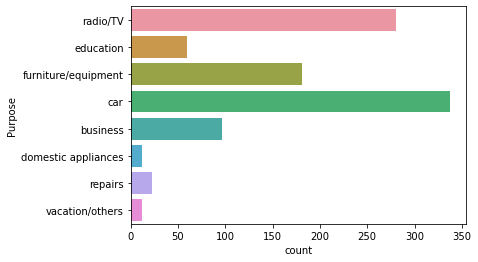

In [16]:
for col in df[categorical].columns:
    sns.countplot(y =col, data = df)
    plt.show()

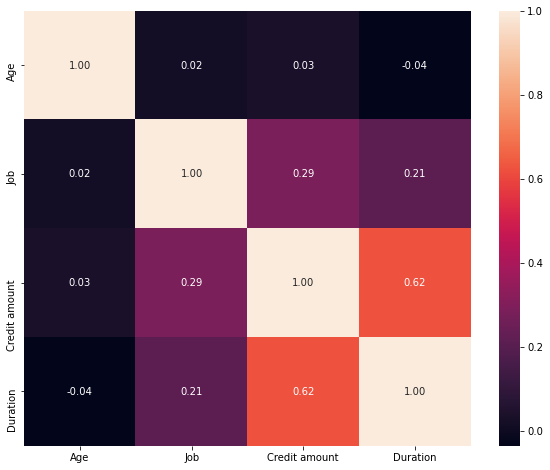

In [17]:
corr = df.corr()
plt.figure(figsize=(10,8));
sns.heatmap(corr, annot=True, fmt='.2f');

In [18]:
data = df.copy()

<AxesSubplot:>

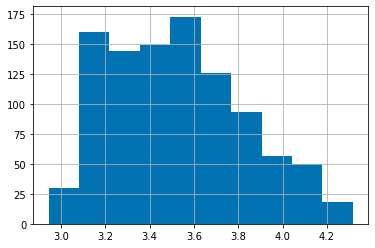

In [19]:
np.log(data['Age']).hist()

In [20]:
data['Age'] = np.log(data['Age'])

<AxesSubplot:>

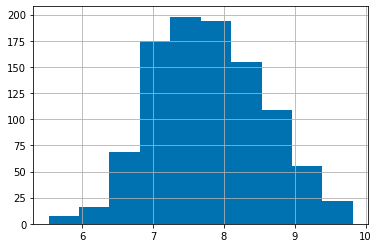

In [21]:
np.log(data['Credit amount']).hist()

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

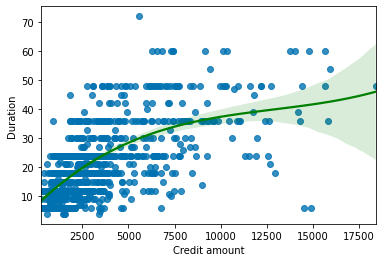

In [69]:
sns.regplot(x=dfeda["Credit amount"], y=dfeda["Duration"],order=3, line_kws={"color":"green"})

<AxesSubplot:xlabel='Sex'>

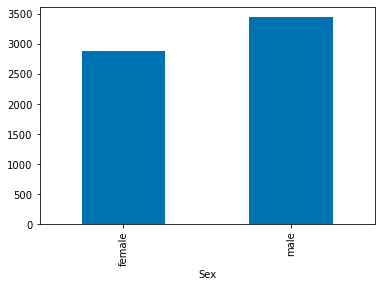

In [70]:
dfeda.groupby("Sex").mean()["Credit amount"].T.plot(kind="bar")

<AxesSubplot:>

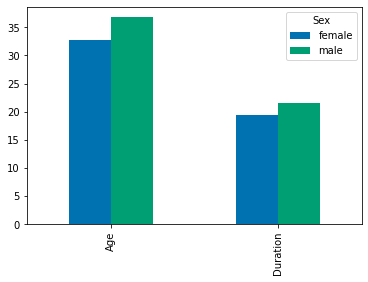

In [71]:
dfeda.groupby("Sex").mean()[["Age", "Duration"]].T.plot(kind="bar")

<AxesSubplot:xlabel='Job'>

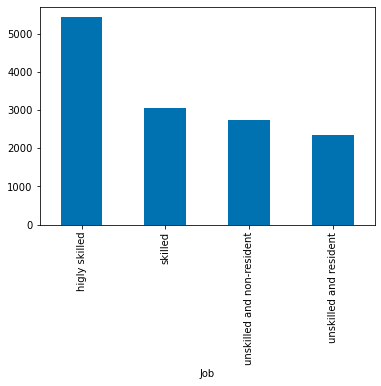

In [72]:
dfeda.groupby("Job").mean()["Credit amount"].T.plot(kind="bar")

<AxesSubplot:>

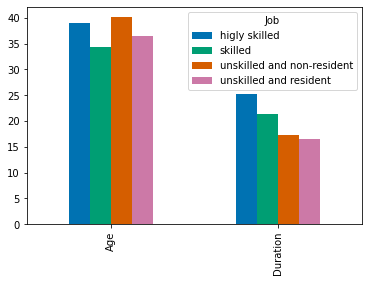

In [73]:
dfeda.groupby("Job").mean()[["Age", "Duration"]].T.plot(kind="bar")

<AxesSubplot:xlabel='Housing'>

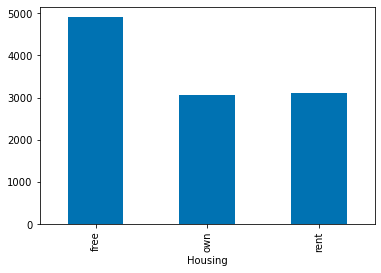

In [74]:
dfeda.groupby("Housing").mean()["Credit amount"].T.plot(kind="bar")

<AxesSubplot:xlabel='Saving accounts'>

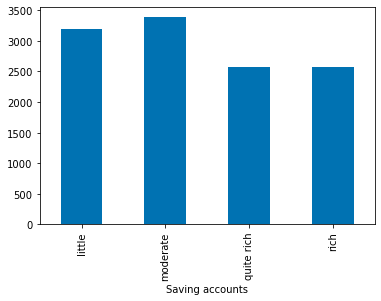

In [75]:
dfeda.groupby("Saving accounts").mean()["Credit amount"].T.plot(kind="bar")

<AxesSubplot:>

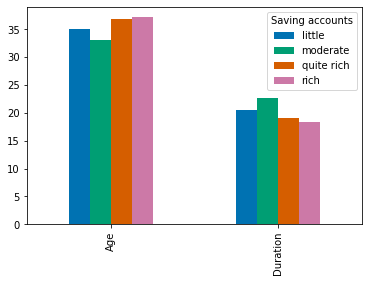

In [76]:
dfeda.groupby("Saving accounts").mean()[["Age", "Duration"]].T.plot(kind="bar")

<AxesSubplot:>

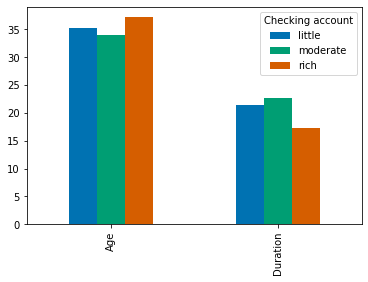

In [77]:
dfeda.groupby("Checking account").mean()[["Age", "Duration"]].T.plot(kind="bar")

In [22]:
data['Credit amount'] = np.log(data['Credit amount'])

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
for label in categorical:
    data[label] = encoder.fit_transform(data[label])

In [25]:
data[categorical]

,Sex,Housing,Saving accounts,Checking account,Purpose
0,1,1,4,0,5
1,0,1,0,1,5
2,1,1,0,3,3
3,1,0,0,0,4
4,1,0,0,0,1
...,...,...,...,...,...
995,0,1,0,3,4
996,1,1,0,0,1
997,1,1,0,3,5
998,1,0,0,0,5


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.271006,0.670280,0.146949,-0.133710,1.833169,-1.254566,-0.933901,-1.236478,1.073263
1,-1.446152,-1.491914,0.146949,-0.133710,-0.699707,-0.459026,1.163046,2.248194,1.073263
2,1.226696,0.670280,-1.383771,-0.133710,-0.699707,1.132053,-0.181559,-0.738668,0.061705
3,0.942455,0.670280,0.146949,-2.016956,-0.699707,-1.254566,1.525148,1.750384,0.567484
4,1.488620,0.670280,0.146949,-2.016956,-0.699707,-1.254566,0.904743,0.256953,-0.949853


In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [29]:
X_pca.shape

(1000, 2)

In [30]:
import umap.umap_ as umap

In [31]:
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

In [32]:
X_umap.shape

(1000, 2)

In [33]:
from sklearn.manifold import TSNE

In [34]:
tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X_scaled)

In [35]:
X_tsne.shape

(1000, 2)

In [36]:
# K-Means
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(data_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

C:\Users\manny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



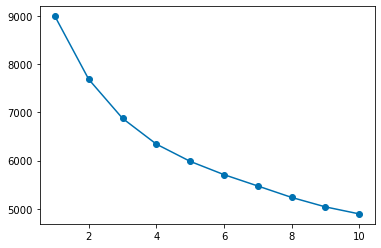

In [37]:
plt.plot(range(1,11), inertia, marker='o');

In [38]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

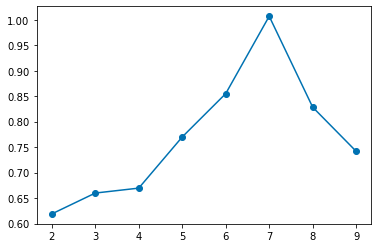

In [39]:
plt.plot(range(2,10), D, marker='o');

In [40]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(X_scaled)
labels_kmeans = kmeans.labels_

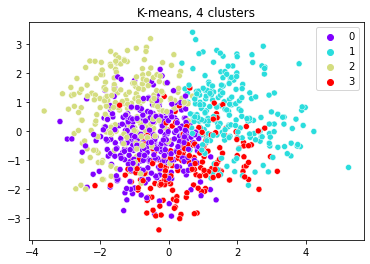

In [41]:
plt.title('K-means, 4 clusters')
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=labels_kmeans, palette='rainbow');

In [42]:
data_clustered = df.copy()
data_clustered['cluster_kmeans'] = labels_kmeans

In [43]:
data_clustered.groupby('cluster_kmeans').mean()[['Age', 'Job', 'Credit amount', 'Duration']]

,Age,Job,Credit amount,Duration
cluster_kmeans,,,,
0,35.611765,1.747059,2022.617647,15.138235
1,36.449541,2.293578,6669.500000,36.087156
2,31.458498,1.739130,2073.667984,16.371542
3,39.857143,1.957672,3200.947090,19.825397


In [44]:
data_clustered['cluster_kmeans'].value_counts()

0    340
2    253
1    218
3    189
Name: cluster_kmeans, dtype: int64

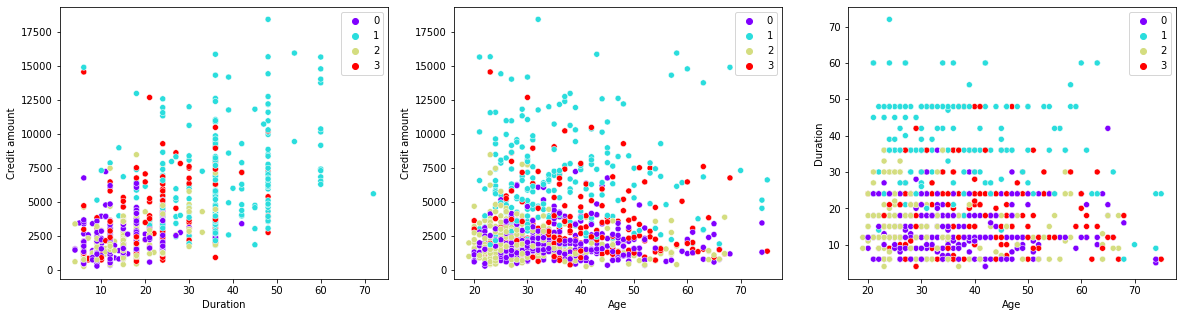

In [45]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x = data_clustered['Duration'], y = data_clustered['Credit amount'], hue=labels_kmeans, ax=ax[0], palette='rainbow');
sns.scatterplot(x = data_clustered['Age'], y = data_clustered['Credit amount'], hue=labels_kmeans, ax=ax[1], palette='rainbow');
sns.scatterplot(x = data_clustered['Age'], y = data_clustered['Duration'], hue=labels_kmeans, ax=ax[2], palette='rainbow');

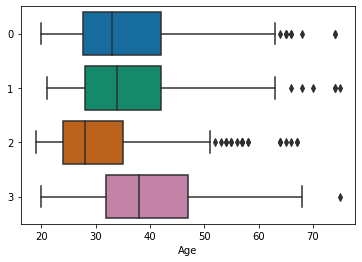

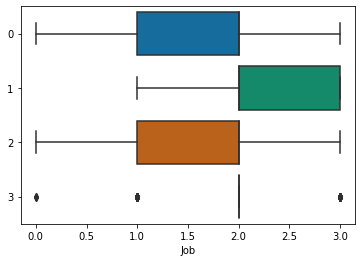

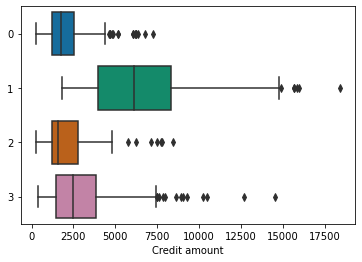

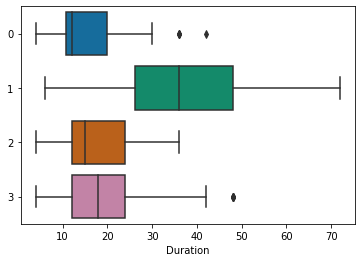

In [46]:
for col in data_clustered[numeric].columns:
    sns.boxplot(data=data_clustered, x=col, y=labels_kmeans, orient='h')
    plt.show();

<AxesSubplot:>

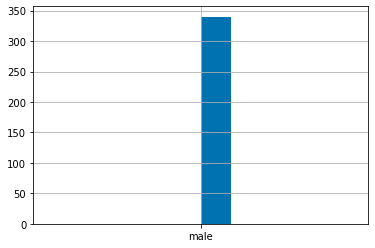

In [47]:
data_clustered[data_clustered['cluster_kmeans']==0]['Sex'].hist()

<AxesSubplot:>

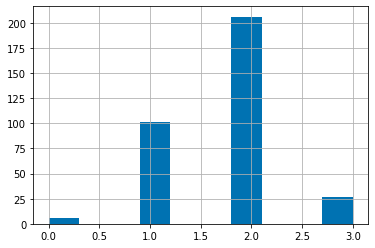

In [48]:
data_clustered[data_clustered['cluster_kmeans']==0]['Job'].hist()

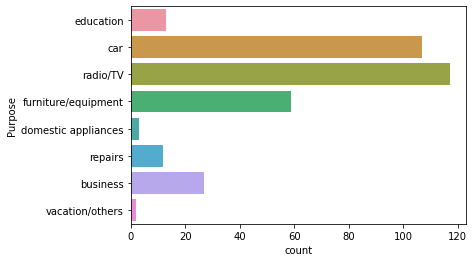

In [49]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==0])
plt.show()

<AxesSubplot:>

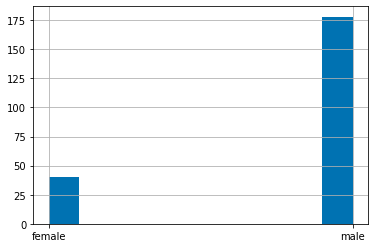

In [50]:
data_clustered[data_clustered['cluster_kmeans']==1]['Sex'].hist()

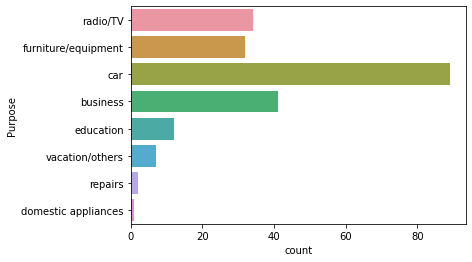

In [51]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==1])
plt.show()

<AxesSubplot:>

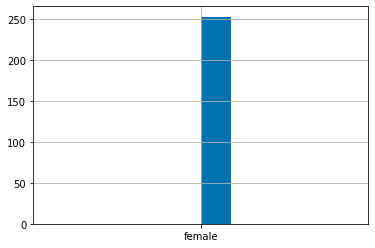

In [52]:
data_clustered[data_clustered['cluster_kmeans']==2]['Sex'].hist()

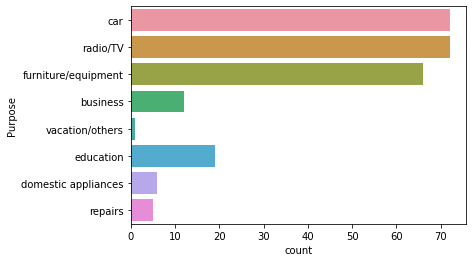

In [53]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==2])
plt.show()

<AxesSubplot:>

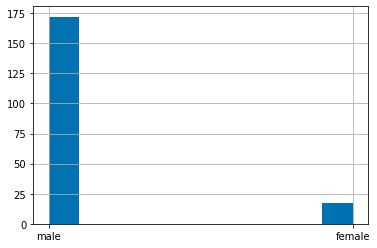

In [54]:
data_clustered[data_clustered['cluster_kmeans']==3]['Sex'].hist()

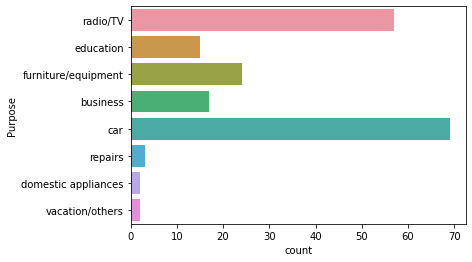

In [55]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==3])
plt.show()